In [13]:
from datetime import datetime
result_1 = datetime(2018, 6, 12, 0, 0) > datetime(2018, 2, 3, 0, 0)
result_2 = datetime(2018, 6, 12, 0, 0) == datetime(2018, 2, 3, 0, 0)
result_3 = datetime(2018, 6, 12, 0, 0) < datetime(2018, 2, 3, 0, 0)
print(result_1,result_2,result_3)

True False False


In [1]:
import datetime
td_today = datetime.datetime(2018, 11, 19)
#td_today = datetime.date.today()
#td_today = datetime.datetime.now()
td = td_today + datetime.timedelta(weeks = 4)
str(td)

'2018-12-17 00:00:00'

In [2]:
from datetime import datetime, timedelta
td_today = datetime(2018, 11, 19)
#td_today = datetime.date.today()
#td_today = datetime.now()
td = td_today + timedelta(weeks = 4)
str(td)

'2018-12-17 00:00:00'

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/hupili/python-for-data-and-media-communication/master/text-analysis/regular_reader_tweets.csv')
print('The length of df is {}'.format(len(df)))
df.tail()

The length of df is 203482


,user_key,created_str,text
203477,nojonathonno,11/1/2016 12:13,"RT @AndreaChalupa: In intel circles, the story..."
203478,judelambertusa,6/18/2015 1:04,RT @KansasCityDNews: Tonganoxie police: Middle...
203479,patriotblake,1/10/2017 18:50,RT @signsinyork: Getting the right #company lo...
203480,dailysandiego,11/20/2016 21:49,The Latest: Obama affirms continuity of ties w...
203481,willisbonnerr,12/19/2016 23:00,RT @futureguru100: U cant just Upload a CD onl...


In [3]:
df = df.sample(frac=0.1)
print('After sample, the length of df is {}'.format(len(df)))
df.tail()

After sample, the length of df is 20348


,user_key,created_str,text
107146,paulinett,2/3/2017 19:08,RT @blicqer: ▶@TSDMemphis: How Tarik Black bal...
174014,melanymelanin,2/26/2016 13:53,#TrayvonMartin’s death is an obvious example o...
19336,brianaregland,12/7/2016 1:44,RT @TelleyMJay: This show keeps you on an emot...
47595,jeannemccarthy0,1/16/2015 17:36,#IAmOnFire her face hahahah http://t.co/vadnbf...
124744,paolakinck,9/12/2016 23:58,RT @NancyRichmond: Leaders are human #HillaryC...


In [4]:
from datetime import datetime
from dateutil import parser
import numpy
def parse_datetime(x):
    try:
        return parser.parse(x)
    except:
        return numpy.nan
df['datetime'] = df['created_str'].apply(parse_datetime)

In [11]:
df.set_index('datetime').resample('1W').aggregate('count').tail()

,user_key,created_str,text
datetime,,,
2017-09-03,7,7,7
2017-09-10,1,1,1
2017-09-17,3,3,3
2017-09-24,0,0,0
2017-10-01,1,1,1


In [13]:
df.set_index('datetime').resample('1w').aggregate('count').plot()

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]

In [14]:
def has_hillary(t):
    return 'hillary' in str(t).lower()
def has_trump(t):
    return 'trump' in str(t).lower()
df['kw-hillary'] = df['text'].apply(has_hillary)
df['kw-trump'] = df['text'].apply(has_trump)
df.head()

,user_key,created_str,text,datetime,kw-hillary,kw-trump
178089,patriotblake,12/10/2016 20:27,RT @BBCBreaking: Gambian President Yahya Jamme...,2016-12-10 20:27:00,False,False
183585,jacquelinisbest,12/7/2016 4:09,RT @martinez4_david: @FoxNews @BarackObama No ...,2016-12-07 04:09:00,False,False
147242,melanymelanin,1/3/2017 14:42,RT @MsPackyetti: You seriously need to read th...,2017-01-03 14:42:00,False,False
108892,wadeharriot,8/18/2016 10:18,RT @LindaSuhler: Donald Trump will #MakeAmeric...,2016-08-18 10:18:00,False,True
75518,willisbonnerr,1/5/2017 7:46,RT @nine_oh: The average female orgasm lasts f...,2017-01-05 07:46:00,False,False


In [17]:
df.set_index('datetime').resample('1w').aggregate('sum').tail(10)

,kw-hillary,kw-trump
datetime,,
2017-07-30,0.0,2.0
2017-08-06,0.0,3.0
2017-08-13,0.0,2.0
2017-08-20,0.0,0.0
2017-08-27,0.0,0.0
2017-09-03,0.0,0.0
2017-09-10,0.0,0.0
2017-09-17,0.0,0.0
2017-09-24,0.0,0.0


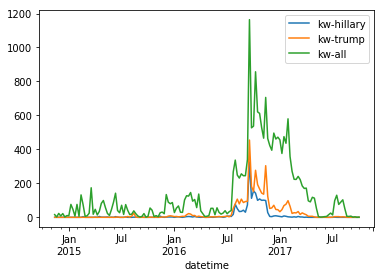

In [19]:
df['kw-all'] = df['text'].apply(lambda x: 1)
df.set_index('datetime').resample('1w').aggregate('sum').plot()

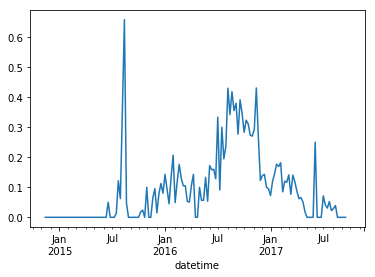

In [20]:
df_kws = df.set_index('datetime').resample('1w').aggregate('sum')
(df_kws['kw-trump'] / df_kws['kw-all']).plot()

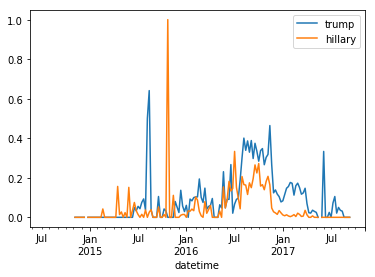

In [63]:
s_trump_ratio = (df_kws['kw-trump'] / df_kws['kw-all'])
s_hillary_ratio = (df_kws['kw-hillary'] / df_kws['kw-all'])
pd.DataFrame({'trump':s_trump_ratio, 'hillary': s_hillary_ratio}).plot()

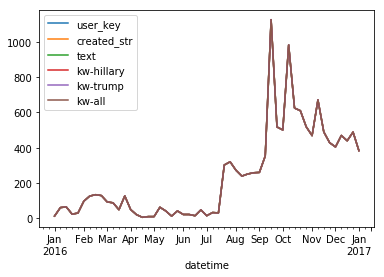

In [64]:
df[
    (df['datetime'] > datetime(2016, 1, 1)) &
    (df['datetime'] < datetime(2017, 1, 1))
].set_index('datetime').resample('1w').aggregate('count').plot()

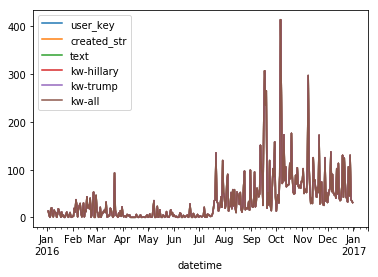

In [65]:
df[
    (df['datetime'] > datetime(2016, 1, 1)) &
    (df['datetime'] < datetime(2017, 1, 1))
].set_index('datetime').resample('1d').aggregate('count').plot()

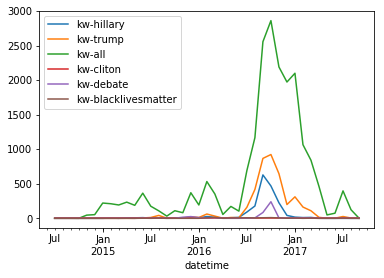

In [66]:
df['kw-cliton'] = df['text'].apply(lambda t: 'cliton' in str(t).lower())
df['kw-debate'] = df['text'].apply(lambda t: 'debate' in str(t).lower())
df['kw-blacklivesmatter'] = df['text'].apply(lambda t: 'blacklivesmatter' in str(t).lower())
df_kws = df.set_index('datetime').resample('1m').aggregate('sum')
df_kws.plot()

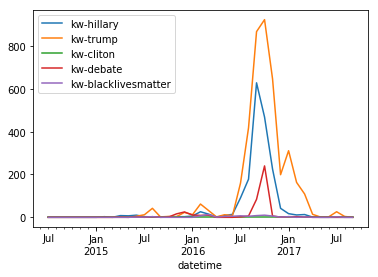

In [67]:
del df_kws['kw-all']
df_kws.plot()

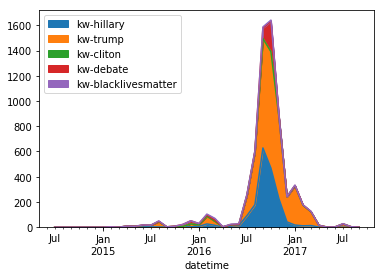

In [68]:
df_kws.plot(kind='area')

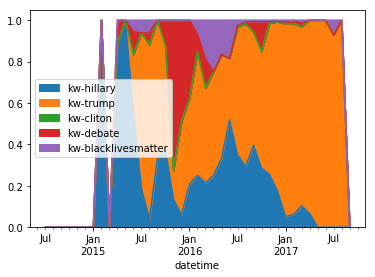

In [69]:
df_kws.divide(df_kws.sum(axis=1), axis=0).plot(kind='area')